# Vårt superprosjekt

## a

We initalize and test the functionality of Qiskit as follows

In [2]:
from qiskit import QuantumCircuit,Aer,assemble, ClassicalRegister,QuantumRegister
from qiskit.visualization import array_to_latex, plot_histogram
import numpy as np
import matplotlib.pyplot as plt
simulator = Aer.get_backend('aer_simulator')

In [3]:
qr = QuantumRegister(1, 'Qreg')
cr = ClassicalRegister(1, 'Creg')

qc = QuantumCircuit()
qc.add_register(qr)
qc.add_register(cr)
#qc.save_statevector()

qc.x(0)
qc.y(0)
qc.z(0)
qc.h(0)
qc.p(np.pi/2, 0)


qc.draw()

┌───┐┌───┐┌───┐┌───┐┌────────┐
  Qreg: ┤ X ├┤ Y ├┤ Z ├┤ H ├┤ P(π/2) ├
        └───┘└───┘└───┘└───┘└────────┘
Creg: 1/══════════════════════════════

Initialize a Bell state by applying Haddamard to G0 and CNOT on G1, using G0 as control gate.

In [4]:
qc_2 = QuantumCircuit()

qr_2 = QuantumRegister(2, 'qreg')
qc_2.add_register(qr_2)

cr_2 = ClassicalRegister(2, 'creg')
qc_2.add_register(cr_2)
qc_2.h(0)
qc_2.cx(0,1)
qc_2.save_statevector()
qc_2.measure(qr_2[0], cr_2[0])
qc_2.measure(qr_2[1], cr_2[1])
qc_2.draw()

┌───┐      statevector ┌─┐   
qreg_0: ┤ H ├──■────────░──────┤M├───
        └───┘┌─┴─┐      ░      └╥┘┌─┐
qreg_1: ─────┤ X ├──────░───────╫─┤M├
             └───┘      ░       ║ └╥┘
creg: 2/════════════════════════╩══╩═
                                0  1

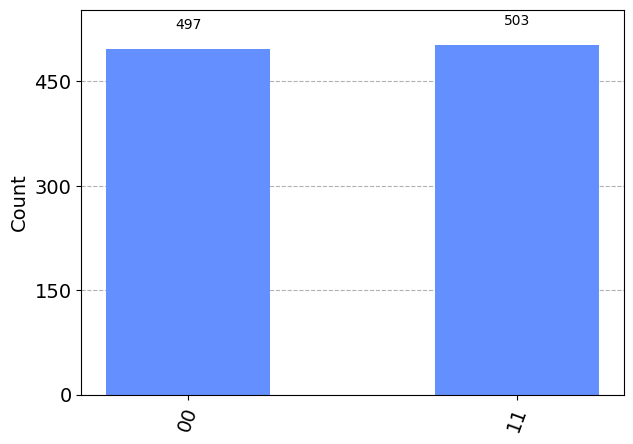

In [5]:
job = simulator.run(qc_2, shots=1000)
hist = job.result().get_counts()
plot_histogram(hist)

This is statistically in accordance with the expected Bell states.

## b


Here we initialize the Hamiltonian matrices and solve it using eigsolvers.


[[2.         0.13333333]
 [0.13333333 2.        ]]

[2.13333333 1.86666667] 

 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


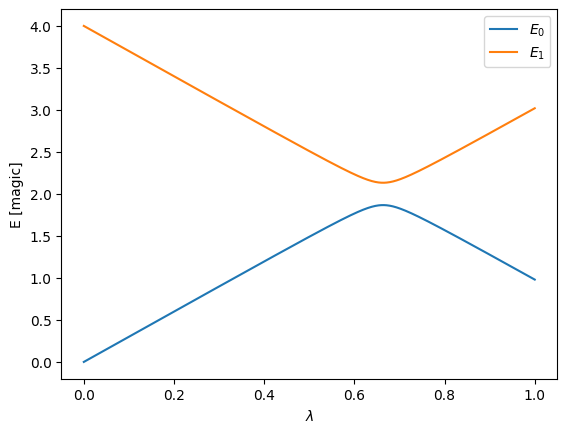

In [6]:
H0 = np.eye(2)
E1 = 0; E2 = 4
H0[0,0] = E1; H0[1,1] = E2


H1 = np.eye(2)
v11 = 3; v22 = -v11; v12 = 0.2; v21 = v12
H1[0,0] = v11; H1[0,1] = v12; H1[1,0] = v21; H1[1,1] = v22 

lmd_ = 2/3#Range [0,1]
pauli_x = np.matrix([[0,1],[1,0]])
pauli_z = np.matrix([[1,0],[0,-1]])
c = (v11 + v22)/2
omega_z = (v11-v22)/2
omega_x = v12

H_ = H0 + lmd_*H1

print(H_)
print()
eig_val, eig_vec = np.linalg.eig(H_)
print(eig_val,'\n\n', eig_vec)


n = 1000
lambdas = np.linspace(0,1,n)
Es = np.zeros((n,2))
C1s, C2s  = np.zeros_like(Es), np.zeros_like(Es)
for i, lmd_ in enumerate(lambdas):
    H_ = H0 + lmd_*H1
    eig_val, eig_vec = np.linalg.eigh(H_)
    # print(H_)
    Es[i,:] = eig_val
    C1s[i,:] = eig_vec[:,0]
    C2s[i,:] = eig_vec[:,1] 

fig, ax = plt.subplots()
ax.plot(lambdas, Es[:,0], label=r"$E_0$")
ax.plot(lambdas, Es[:,1], label=r"$E_1$")
ax.set(xlabel=r"$\lambda$", ylabel="E [magic]")
ax.legend() # Kan legge til fancy-pancy color bar for a vise "change of character" opplegget?

## c


In [7]:
from qiskit.algorithms.minimum_eigensolvers import VQE
from functools import partial
from scipy.optimize import minimize
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.opflow import X, Z, I

optimizer = partial(minimize, method="L-BFGS-B")

[0.22239099 0.59939862]


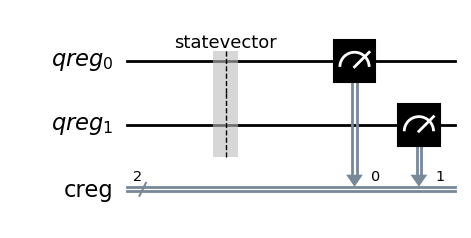

In [8]:
qc_3 = QuantumCircuit()

qr_3 = QuantumRegister(2, 'qreg')
qc_3.add_register(qr_3)

cr_3 = ClassicalRegister(2, 'creg')
qc_3.add_register(cr_3)

eta = (E1 + E2)/2
Omega = (E1-E2)/2
H0 = eta*np.eye(2) + Omega*pauli_z
are = Operator(Pauli('X'))

H1 = c * np.eye(2) + omega_z * pauli_z + omega_x * pauli_x
#I = Operator( Pauli('X') )

X_op = Operator(Pauli('X'))
Z_op = Operator(Pauli('Z'))
idty = Operator(np.eye(2))
#c_op = Operator(Multiply(0.3))

#X_op.multiply(1)
#op_ = eta*idty + Omega*Z_op + lmd_*(c*idty + omega_z*Z_op + omega_x * X_op)
#print(op_.is_unitary())
#Trenger en unitær operator for å klare å implementere det. Noen idé?

print(np.random.randn(2))


qc_3.save_statevector()
qc_3.measure(qr_3[0], cr_3[0])
qc_3.measure(qr_3[1], cr_3[1])
qc_3.draw('mpl')

## Mortenmåten

In [9]:
I = np.eye(2)
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])

H0 = np.kron(I,I) + np.kron(Z,I)
H1 = np.kron(I,I) + np.kron(I,Z) + np.kron(I,X) 
 
H_tot = H0 + H1

print(H_tot)

[[4. 1. 0. 0.]
 [1. 2. 0. 0.]
 [0. 0. 2. 1.]
 [0. 0. 1. 0.]]


In [10]:
c = (v11 + v22)/2
omega_z = (v11-v22)/2
omega_x = v12
eta = (E1+E2)/2
omega_ = (E1-E2)/2

h1_val = c + eta
h2_val = omega_
h3_val = omega_z
h4_val = omega_x

h1 = [h1_val, [0,1] , ['I']]
h2 = [h2_val, [0] , ['Z']]
h3 = [h3_val, [1] , ['Z']]
h4 = [h4_val, [1] , ['X']]

H = [h1,h2,h3,h4]
H

[[2.0, [0, 1], ['I']],
 [-2.0, [0], ['Z']],
 [3.0, [1], ['Z']],
 [0.2, [1], ['X']]]

In [11]:
def ansatz(theta,n_qubits):
    qreg = QuantumRegister(n_qubits)
    circuit = QuantumCircuit(qreg)
    for i in range(n_qubits):
        circuit.ry(theta[i],qreg[i])
    for i in range(n_qubits-1):
        circuit.cx(qreg[i],qreg[i+1])
    return(circuit)


Before ansatz


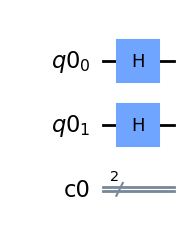

In [12]:
n_qbits = 2
theta = np.random.randn(2)

qc = QuantumCircuit()
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)

qc.add_register(qreg)
qc.add_register(creg)
qc.h(qreg[:])

print('Before ansatz')
qc.draw('mpl')


After ansatz


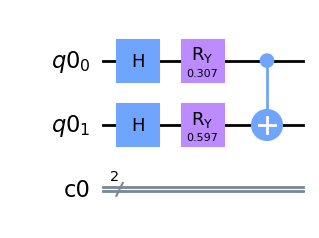

In [13]:
qc = qc.compose(ansatz(theta,n_qbits))
print('After ansatz')
qc.draw('mpl')

In [14]:
def basis_change(h_i,n_qubits):
    qreg = QuantumRegister(n_qubits)
    circuit = QuantumCircuit(qreg)
    
    
    ##Må nok modifisere denne  litt da den kanskje er litt for genrell
    for qubit,operator in zip(h_i[1],h_i[2]):
        if operator == 'X':
            circuit.h(qreg[qubit])
        if operator == 'Z':
            circuit.sdg(qreg[qubit])   ##Litt usikker på hvorfor vi bruker SDG
            circuit.h(qreg[qubit])
    return(circuit)

After basis transformation:


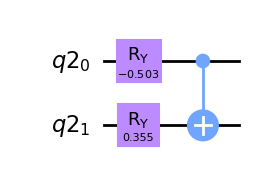

In [15]:
n_qubits = 2
theta = np.random.randn(n_qubits)

qreg = QuantumRegister(n_qubits)
qc = QuantumCircuit(qreg)
qc = qc.compose(ansatz(theta,n_qubits))
qc = qc.compose(basis_change(H[0],n_qubits))
print('After basis transformation:')
qc.draw('mpl')

In [16]:
def get_energy(theta):
    n_qubits = 2
    qreg = QuantumRegister(n_qubits)
    qc = QuantumCircuit(qreg)
    qc = qc.compose(ansatz(theta,n_qubits))
    qc_list = []
    for idx,h_i in enumerate(H):
        basis_change_circuit = basis_change(h_i,n_qubits)
        new_qc = qc.compose(basis_change_circuit)
        creg = ClassicalRegister(len(h_i[1]))
        new_qc.add_register(creg)
        new_qc.measure(qreg[h_i[1]],creg)
        qc_list.append(new_qc)
        
    shots = 10000
    job = simulator.run(qc_list,shots=shots)
    E = np.zeros(len(qc_list))
    for i in range(len(E)):
        result = job.result()
        counts = result.get_counts(i)
        for key,value in counts.items():
            e = 1
            for bit in key:
                if bit == '0':
                    e *= 1
                if bit == '1':
                    e *= -1
            E[i] += e*value
        E[i] *= H[i][0]
    E /= shots
    return(np.sum(E))

theta = np.random.randn(2)
get_energy(theta)

0.9360400000000001

In [17]:
theta = np.random.randn(2)
res = minimize(get_energy, theta, method='Powell',tol=1e-12)
get_energy(res.x)

-2.01636

In [18]:
epochs = 200
theta = np.random.randn(4)
for epoch in range(epochs):
    print(epoch,get_energy(theta))
    grad = np.zeros_like(theta)
    for idx in range(theta.shape[0]):
        theta_temp = theta.copy()
        theta_temp[idx] += np.pi/2
        E_plus = get_energy(theta_temp)
        theta_temp[idx] -= np.pi
        E_minus = get_energy(theta_temp)
        grad[idx] = (E_plus - E_minus)/2
    theta -= 0.1*grad

0 0.7456
1 0.31552
2 0.06016000000000002
3 -0.42832000000000003
4 -0.72648
5 -1.0751600000000001
6 -1.4598
7 -1.55844
8 -1.70784
9 -1.86408
10 -1.88764
11 -1.96544
12 -1.9349599999999998
13 -1.97352
14 -2.0217199999999997
15 -2.0058399999999996
16 -2.02188
17 -1.9886
18 -2.09092
19 -2.04732
20 -1.9823199999999999
21 -1.9747999999999999
22 -2.03252
23 -1.9500799999999998
24 -2.01448
25 -1.96004
26 -1.98176
27 -2.0051200000000002
28 -1.9868000000000001
29 -1.9819200000000001
30 -1.95772
31 -2.03572
32 -1.9344799999999998
33 -2.01048
34 -2.01888
35 -2.05156
36 -2.10952
37 -2.07056
38 -1.9805199999999998
39 -1.98568
40 -2.05552
41 -1.96172
42 -2.0259600000000004
43 -2.00164
44 -2.0286000000000004
45 -1.98972
46 -2.0266
47 -2.01684
48 -2.03212
49 -2.0204
50 -2.06628
51 -2.02308
52 -2.08068
53 -2.0405599999999997
54 -1.94352
55 -2.06224
56 -2.04204
57 -2.0427600000000004
58 -2.1022
59 -1.94516
60 -2.02388
61 -2.00728
62 -1.98628
63 -1.9796000000000002
64 -1.9691999999999998
65 -2.01808
66 -1

In [19]:
#1d
#Skal gjennomføres som funksjon av lambda, tar det siden
lmd_ = 0.8
s_00 = np.array([1,0,0,0])
s_10 = np.array([0,1,0,0])
s_01 = np.array([0,0,1,0])
s_11 = np.array([0,0,0,1])
#Kan eventuelt bruke np.kron( [1,0], [0,1])
        
eps_list = [0,2.5,6.5,7]
H0 = np.eye(4)
H0[0,0] = eps_list[0];H0[1,1] = eps_list[1];H0[2,2] = eps_list[2];H0[3,3] = eps_list[3]

pauli_x = np.matrix([[0,1],[1,0]])
pauli_z = np.matrix([[1,0],[0,-1]])
H_x = 2.0
H_z = 3.0
H_I = H_x * np.kron(pauli_x, pauli_x) + H_z * np.kron(pauli_z, pauli_z)

H_tot = H0 + lmd_*H_I
#print(H_tot)

eig_vals, eig_vecs = np.linalg.eig(H_tot)
#print(eig_vals) 
#print()
#print(eig_vecs)

#Computing partial density matrix
rho_a = (eig_vecs[0].max() + eig_vecs[1].max()) * np.outer(s_00,s_00) + (eig_vecs[2].max() + eig_vecs[3].max()) * np.outer(s_11,s_11)
rho_b = (eig_vecs[0].max() + eig_vecs[2].max()) * np.outer(s_00,s_00) + (eig_vecs[1].max() + eig_vecs[3].max()) * np.outer(s_11,s_11)

#Compute entropy
S_a = - np.trace(rho_a)*np.log2(np.trace(rho_a))
S_b = - np.trace(rho_b)*np.log2(np.trace(rho_b))
S_a, S_b

(-3.207020335903938, -3.207020335903938)

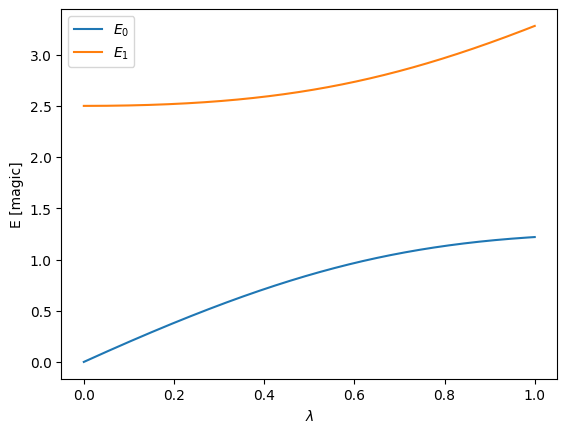

In [20]:
n = 1000
lambdas = np.linspace(0,1,n)
Es = np.zeros((n,4))
C1s, C2s  = np.zeros_like(Es), np.zeros_like(Es)

for i, lmd_ in enumerate(lambdas):
    H_ = H0 + lmd_*H1
    eig_val, eig_vec = np.linalg.eigh(H_)
    #print(eig_val)
    #print(eig_vec.shape)
    Es[i,:] = eig_val
    #C1s[i,:] = eig_vec[:,0]
    #C2s[i,:] = eig_vec[:,1] 

fig, ax = plt.subplots()
ax.plot(lambdas, Es[:,0], label=r"$E_0$")
ax.plot(lambdas, Es[:,1], label=r"$E_1$")
ax.set(xlabel=r"$\lambda$", ylabel="E [magic]")
ax.legend() # Kan legge til fancy-pancy color bar for a vise "change of character" opplegget?

The entropy is as expected, similar, as there are no difference in the configuration of the two states. As such, there should be an equal amount of entanglement entropy. The energies follow the same asymptotic convergence, which indeed confirms their entanglement.

## Stian-måten


In [21]:
import numpy as np
import qiskit as qk
from scipy.optimize import minimize
simulator = qk.Aer.get_backend('qasm_simulator') 

In [22]:
n_qubits = 2
n_cbits = 2
qreg = qk.QuantumRegister(n_qubits)
creg = qk.ClassicalRegister(n_cbits)
circuit = qk.QuantumCircuit(qreg,creg)

In [23]:
I = np.eye(2)
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])
hx = 2; hz = 3; eps_list = [0,2.5,6.5,7]

H_0 = np.matrix([[eps_list[0],0,0,0],[0,eps_list[1],0,0],[0,0,eps_list[2],0],[0,0,0,eps_list[3]]])
H_I = hx * np.kron(X,X) + hz* np.kron(Z,Z) 
H = H_0 + H_I
eigvals,eigvecs = np.linalg.eigh(H)
print(eigvals)
print(eigvecs)

c_1 = 1
c_2 = 1
c_3 = 1

h_1 = [c_1,[0],['z,z']]
h_2 = [c_2,[1],['x,x']]
H = [h_1,h_2]

[-1.32842712  2.46887113  4.32842712 10.53112887]
[[-0.         -0.96649965  0.         -0.25666794]
 [ 0.92387953  0.         -0.38268343  0.        ]
 [-0.38268343  0.         -0.92387953  0.        ]
 [ 0.          0.25666794  0.         -0.96649965]]


In [24]:
def ansatz(theta,n_qubits):
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    for i in range(n_qubits):
        circuit.ry(theta[i],qreg[i])
    for i in range(n_qubits-1):
        circuit.cx(qreg[i],qreg[i+1])
    return(circuit)

qreg = qk.QuantumRegister(n_qubits)
circuit = qk.QuantumCircuit(qreg)
circuit.h(qreg[:2])
print('Before ansatz')
print(circuit.draw())
theta = np.random.randn(2)
n_qubits = 2
circuit = circuit.compose(ansatz(theta,n_qubits))
print('After ansatz')
print(circuit.draw())

Before ansatz
          ┌───┐
q11940_0: ┤ H ├
          ├───┤
q11940_1: ┤ H ├
          └───┘
After ansatz
          ┌───┐┌─────────────┐      
q11940_0: ┤ H ├┤ Ry(0.26475) ├───■──
          ├───┤├─────────────┴┐┌─┴─┐
q11940_1: ┤ H ├┤ Ry(-0.33731) ├┤ X ├
          └───┘└──────────────┘└───┘


In [25]:
def basis_change(h_i,n_qubits):
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    
    for qubit,operator in zip(h_i[1],h_i[2]):
        if operator == 'x':
            circuit.h(qreg[qubit])
        if operator == 'z':
            #circuit.sdg(qreg[qubit])
            circuit.h(qreg[qubit])
    return(circuit)
n_qubits = 2
qreg = qk.QuantumRegister(n_qubits)
circuit = qk.QuantumCircuit(qreg)
theta = np.random.randn(n_qubits)
circuit = circuit.compose(ansatz(theta,n_qubits))
print('Ansatz circuit')
print(circuit.draw())
circuit = circuit.compose(basis_change(H[1],n_qubits))
print('After basis transformation:')
print(circuit.draw())

Ansatz circuit
          ┌─────────────┐     
q11942_0: ┤ Ry(0.42426) ├──■──
          └┬────────────┤┌─┴─┐
q11942_1: ─┤ Ry(1.1769) ├┤ X ├
           └────────────┘└───┘
After basis transformation:
          ┌─────────────┐     
q11942_0: ┤ Ry(0.42426) ├──■──
          └┬────────────┤┌─┴─┐
q11942_1: ─┤ Ry(1.1769) ├┤ X ├
           └────────────┘└───┘


In [26]:
def get_energy(theta):
    n_qubits = 2
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    circuit = circuit.compose(ansatz(theta,n_qubits))
    circuit_list = []
    for idx,h_i in enumerate(H):
        basis_change_circuit = basis_change(h_i,n_qubits)
        new_circuit = circuit.compose(basis_change_circuit)
        creg = qk.ClassicalRegister(len(h_i[1]))
        new_circuit.add_register(creg)
        new_circuit.measure(qreg[h_i[1]],creg)
        circuit_list.append(new_circuit)
    shots = 10000
    job = simulator.run(circuit_list,shots=shots)
    E = np.zeros(len(circuit_list))
    for i in range(len(circuit_list)):
        result = job.result()
        counts = result.get_counts(i)
        for key,value in counts.items():
            e = 1
            for bit in key:
                if bit == '0':
                    e *= 1
                if bit == '1':
                    e *= -1
            E[i] += e*value
        E[i] *= H[i][0]
    E /= shots
    return(np.sum(E))

theta = np.random.randn(2)
get_energy(theta)

0.9621999999999999

In [27]:
#Minimize the data
theta = np.random.randn(2)
res = minimize(get_energy, theta, method='Powell',tol=1e-12)
get_energy(res.x)



-2.0

In [28]:
"""
## We might need a more flexible ansatz
def ansatz(theta,n_qubits):
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    idx = 0
    for i in range(n_qubits):
        circuit.ry(theta[idx],qreg[i])
        idx += 1
    for i in range(n_qubits-1):
        circuit.cx(qreg[i],qreg[i+1])
    for i in range(n_qubits):
        circuit.rx(theta[idx],qreg[i])
        idx += 1
    for i in range(n_qubits-1):
        circuit.cx(qreg[i],qreg[i+1])
    return(circuit)
theta = np.random.randn(4)
res = minimize(get_energy, theta, method='Powell',tol=1e-16)
get_energy(res.x)
"""

"\n## We might need a more flexible ansatz\ndef ansatz(theta,n_qubits):\n    qreg = qk.QuantumRegister(n_qubits)\n    circuit = qk.QuantumCircuit(qreg)\n    idx = 0\n    for i in range(n_qubits):\n        circuit.ry(theta[idx],qreg[i])\n        idx += 1\n    for i in range(n_qubits-1):\n        circuit.cx(qreg[i],qreg[i+1])\n    for i in range(n_qubits):\n        circuit.rx(theta[idx],qreg[i])\n        idx += 1\n    for i in range(n_qubits-1):\n        circuit.cx(qreg[i],qreg[i+1])\n    return(circuit)\ntheta = np.random.randn(4)\nres = minimize(get_energy, theta, method='Powell',tol=1e-16)\nget_energy(res.x)\n"

In [29]:
##Gradient descent
epochs = 200
theta = np.random.randn(4)
for epoch in range(epochs):
    print(epoch,get_energy(theta))
    grad = np.zeros_like(theta)
    for idx in range(theta.shape[0]):
        theta_temp = theta.copy()
        theta_temp[idx] += np.pi/2
        E_plus = get_energy(theta_temp)
        theta_temp[idx] -= np.pi
        E_minus = get_energy(theta_temp)
        grad[idx] = (E_plus - E_minus)/2
    theta -= 0.1*grad

0 -0.13219999999999998
1 -0.5364
2 -0.866
3 -1.193
4 -1.4292
5 -1.6048
6 -1.7318
7 -1.8296000000000001
8 -1.8976000000000002
9 -1.9232
10 -1.9434
11 -1.9714
12 -1.9788000000000001
13 -1.987
14 -1.9922
15 -1.9948000000000001
16 -1.9952
17 -1.9978
18 -1.9978
19 -1.9988000000000001
20 -1.9988
21 -1.9994
22 -1.9994
23 -2.0
24 -2.0
25 -1.9998
26 -1.9998
27 -2.0
28 -1.9998
29 -2.0
30 -2.0
31 -2.0
32 -2.0
33 -2.0
34 -2.0
35 -2.0
36 -1.9998
37 -2.0
38 -2.0
39 -2.0
40 -2.0
41 -2.0
42 -2.0
43 -2.0
44 -2.0
45 -2.0
46 -2.0
47 -2.0
48 -2.0
49 -2.0
50 -2.0
51 -2.0
52 -2.0
53 -2.0
54 -2.0
55 -2.0
56 -2.0
57 -2.0
58 -2.0
59 -2.0
60 -2.0
61 -2.0
62 -2.0
63 -2.0
64 -2.0
65 -2.0
66 -2.0
67 -2.0
68 -2.0
69 -2.0
70 -2.0
71 -2.0
72 -2.0
73 -2.0
74 -2.0
75 -2.0
76 -2.0
77 -2.0
78 -2.0
79 -2.0
80 -2.0
81 -2.0
82 -2.0
83 -2.0
84 -2.0
85 -2.0
86 -2.0
87 -2.0
88 -2.0
89 -2.0
90 -2.0
91 -2.0
92 -2.0
93 -2.0
94 -2.0
95 -2.0
96 -2.0
97 -2.0
98 -2.0
99 -2.0
100 -2.0
101 -2.0
102 -2.0
103 -2.0
104 -2.0
105 -2.0
106 -

## 1f)

In [30]:
v = 10
I = np.eye(2)
H_4 = -(np.kron(pauli_z,I) + np.kron(I, pauli_z)) - np.sqrt(6)/2 * v *(np.kron(pauli_x, I) + 
                                                                       np.kron(I, pauli_x) + 
                                                                       np.kron(pauli_x, pauli_z) - 
                                                                       np.kron(pauli_z, pauli_x))
H_4_o = - pauli_z - 3*v*pauli_x


eigval_even, eigvec_even = np.linalg.eig(H_4)
eigval_odd, eigvec_odd = np.linalg.eig(H_4_o)

print(eigval_even)
print(eigval_odd)


[-3.46987031e+01  9.09862463e-16  3.46987031e+01 -0.00000000e+00]
[-30.01666204  30.01666204]


Disse verdiene stemmer på en såkalt prikk med analytiske verdier. Det er jo ganske lovende. Det er mulig her å lage noen fancy plot der vi varierer på v, eller tilnærmer Hartree-Fock?

Det er ganske snodig dette med VQE, men prøver bare:

In [58]:
h1_lip = [-1, [0,1], ['z']]
h2_lip = [-np.sqrt(6)/2*v, [0], ['x']]
h3_lip = [-np.sqrt(6)/2*v, [1], ['x']]
h4_lip = [-np.sqrt(6)/2*v, [0,1], ['xz']]
h5_lip = [np.sqrt(6)/2*v, [0,1], ['zx']]
H_4_lip = [h1_lip, h2_lip, h3_lip, h4_lip, h5_lip]

In [61]:
from qiskit import transpile 
def ansatz(theta,n_qubits):
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    for i in range(n_qubits-1):
        circuit.ry(theta[i],qreg[i])
    for i in range(n_qubits-1):
        circuit.cry(theta[i],qreg[i], qreg[i+1])
    #Transpile the gate in terms of a set of basis gates which the simulator understands
    circuit = transpile(circuit, backend = simulator)
    return(circuit)

def basis_change(h_i , n_qubits):
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    for qubit,operator in zip(h_i[1],h_i[2]):
        if operator == 'z':
            circuit.z(qreg[qubit])
            circuit.z(qreg[qubit+1])
        if operator == 'x':
            if qubit == 1:
                circuit.x(qreg[qubit])#, qreg[qubit-1])
            if qubit == 0:
                circuit.x(qreg[qubit])#, qreg[qubit+1])
        if operator == 'xz':
            circuit.z(qreg[qubit+1])
            circuit.x(qreg[qubit])
        if operator == 'zx':
            circuit.z(qreg[qubit])
            circuit.x(qreg[qubit+1])
    return(circuit)

def get_energy(theta, n_qubits=2):
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    circuit = circuit.compose(ansatz(theta,n_qubits))
    circuit_list = []
    for idx,h_i in enumerate(H_4_lip):
        basis_change_circuit = basis_change(h_i,n_qubits)
        new_circuit = circuit.compose(basis_change_circuit)
        creg = qk.ClassicalRegister(len(h_i[1]))
        new_circuit.add_register(creg)
        new_circuit.measure(qreg[h_i[1]],creg)
        circuit_list.append(new_circuit)
        print(new_circuit.draw())
    shots = 10000
    job = simulator.run(circuit_list,shots=shots)
    E = np.zeros(len(circuit_list))
    for i in range(len(circuit_list)):
        result = job.result()
        counts = result.get_counts(i)
        #print(counts)
        #exit()
        for key,value in counts.items():
            e = 1
            for bit in key:
                if bit == '0':
                    e *= 1
                if bit == '1':
                    e *= -1
            E[i] += e*value
        E[i] *= H_4_lip[i][0]
    E /= shots
    return(np.sum(E))

a = get_energy(np.random.randn(2))
print(a)

               ┌─────────────┐                                         ┌───┐┌─┐»
q35859_0: ─────┤ Ry(0.16436) ├───────■──────────────────────────────■──┤ Z ├┤M├»
          ┌────┴─────────────┴────┐┌─┴─┐┌────────────────────────┐┌─┴─┐├───┤└╥┘»
q35859_1: ┤ Ry(0.082179406254137) ├┤ X ├┤ Ry(-0.082179406254137) ├┤ X ├┤ Z ├─╫─»
          └───────────────────────┘└───┘└────────────────────────┘└───┘└───┘ ║ »
c20498: 2/═══════════════════════════════════════════════════════════════════╩═»
                                                                             0 »
«             
«q35859_0: ───
«          ┌─┐
«q35859_1: ┤M├
«          └╥┘
«c20498: 2/═╩═
«           1 
               ┌─────────────┐                                         ┌───┐┌─┐
q35859_0: ─────┤ Ry(0.16436) ├───────■──────────────────────────────■──┤ X ├┤M├
          ┌────┴─────────────┴────┐┌─┴─┐┌────────────────────────┐┌─┴─┐└───┘└╥┘
q35859_1: ┤ Ry(0.082179406254137) ├┤ X ├┤ Ry(-0.082179406254137) ├┤ X ├──────╫─
        

In [60]:
n_qubits = 2
theta = np.random.randn(2)
res = minimize(get_energy, theta, method='Powell',tol=1e-12)
get_energy(res.x)

-25.489798448346214

Egenverdier skal være $\big[0, \pm 30.01,\pm 34.69 \big]$ for v = 10, der 30 er for 2x2 matrisen.

Det er forskjell i hvilke forventningsverdier jeg får her og i det analytiske. Tror vi at det er fordi rotasjonsgatene påvirker det endelige resultatet, eller er det fordi jeg har implementert gates feil? Tar veldig gjerne input.

In [34]:
##Gradient descent
epochs = 200
theta = np.random.randn(4)
for epoch in range(epochs):
    print(epoch,get_energy(theta,2))
    grad = np.zeros_like(theta)
    for idx in range(theta.shape[0]):
        theta_temp = theta.copy()
        theta_temp[idx] += np.pi/2
        E_plus = get_energy(theta_temp,2)
        theta_temp[idx] -= np.pi
        E_minus = get_energy(theta_temp,2)
        grad[idx] = (E_plus - E_minus)/2
    theta -= 0.01*grad

0 12.59041553157505
1 7.380857992276267
2 1.3563091429719147
3 -5.7145799906163255
4 -11.374773237505789
5 -16.183589461591758
6 -19.686778163031505
7 -22.21686178272808
8 -23.506751041290286


KeyboardInterrupt: 